In [21]:
from numpy import histogram,log,zeros,sum
from scipy.special import gammaln

def optBINS(data,minM,maxM):
    
    #if (data.len > 2) or (size(data,1) > 1):
    #    error('data dimensions must be (1,N)')
        
    N = len(data)
    # Simply loop through the different numbers of bins
    # and compute the posterior probability for each.
    logp = -1.0e26
    bins = 0
    ll = zeros(maxM+1)
    for M in range(minM,maxM): 
        h = histogram(data,M)[0] # Bin the data (equal width bins here) 
        part1 = N*log(M) + gammaln(M/2.0) - gammaln(N + M/2.0)
        part2 = -M*gammaln(0.5) + np.sum(gammaln(h + 0.5))
        _logp = part1 + part2
        ll[M] = _logp
        if _logp > logp:
            logp = _logp
            bins = M
    
    return bins,logp,ll

In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
a = np.random.randn(10000)

In [28]:
Mmin = 1
Mmax = int(np.sqrt(len(a)))
print Mmin,Mmax
bins, logp, ll = optBINS(a,Mmin,100)

1 100


In [29]:
print bins,logp

25 6661.762190752743


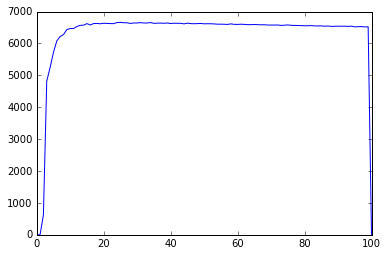

In [30]:
plt.plot(ll)

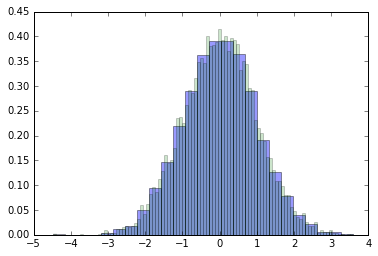

In [33]:
h1 = plt.hist(a,bins=bins,alpha=0.4,normed=True)
h2 = plt.hist(a,bins=100,alpha=0.2,normed=True)